This file is for evaluating meteostat data 

In [21]:
from meteostat import Point, Hourly
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# 4 random points in NYC
p0 = Point(40.76678085327149, -73.9214782714843) # 30 Av (N,W) Queens
p1 = Point(40.68962860107422, -73.9222717285156) # Gates Av (J,Z) Brooklyn
p2 = Point(40.63506317138672, -74.01171875) #8 Av (N) Brooklyn
p3 = Point(40.83648681640625, -73.8470382690429) # Zerega Av (6) Bronx
p4 = Point(40.7789, -73.9692) # Central park USW00094728 station

# 1.5 yrs worth of data
start =  pd.to_datetime('2021-01-01')
end = pd.to_datetime('2024-05-28')

df = pd.DataFrame()

for i, point in enumerate([p0, p1, p2, p3, p4]):
    data = Hourly(p1, start, end)
    new_df = data.fetch()
    new_df['location_index'] = i
    df = pd.concat([df, new_df])
    print(df.shape)

(29833, 12)
(59666, 12)
(89499, 12)
(119332, 12)
(149165, 12)


In [23]:
df.reset_index(inplace=True)

# Data Exploration and Evaluation

In [24]:
df.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index
0,2021-01-01 00:00:00,4.4,-3.4,57.0,NaN,NaN,330.0,20.5,NaN,1026.3,NaN,4.0,0
1,2021-01-01 01:00:00,3.9,-4.3,55.0,0.0,NaN,320.0,22.3,NaN,1027.4,NaN,4.0,0
2,2021-01-01 02:00:00,3.3,-4.4,57.0,0.0,NaN,340.0,18.4,NaN,1027.8,NaN,4.0,0
3,2021-01-01 03:00:00,2.2,-5.0,59.0,0.0,NaN,330.0,16.6,NaN,1028.9,NaN,3.0,0
4,2021-01-01 04:00:00,1.7,-5.0,61.0,0.0,NaN,340.0,14.8,NaN,1029.7,NaN,3.0,0


In [25]:
# Outputs # rows
print("Number of rows:", df.shape[0])
# Outputs # cols
print("Number of cols:", df.shape[1])

Number of rows: 149165
Number of cols: 13


In [26]:
df.dtypes

time              datetime64[ns]
temp                     float64
dwpt                     float64
rhum                     float64
prcp                     float64
snow                     float64
wdir                     float64
wspd                     float64
wpgt                     float64
pres                     float64
tsun                     float64
coco                     float64
location_index             int64
dtype: object

In [27]:
df['coco'] = df['coco'].astype('category')
category_columns = df.select_dtypes(['category']).columns

In [28]:
# Find duplicate rows
print("Number of duplicate rows:", df[df.duplicated()==True].shape[0])

Number of duplicate rows: 0


In [29]:
# Check for null values in each column
print(df.isnull().sum())

time                   0
temp                   0
dwpt                   0
rhum                   0
prcp                  10
snow              149165
wdir                   0
wspd                   0
wpgt              149165
pres                   0
tsun              149165
coco                1150
location_index         0
dtype: int64


In [30]:
# Numeric
numeric_columns = df.select_dtypes(['int64', 'float64', 'datetime64']).columns

In [31]:
# Get cardinality of the numeric columns
numeric_columns_card = df[numeric_columns].nunique()
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
df_numeric_card

,card
time,29833
temp,116
dwpt,445
rhum,93
prcp,101
snow,0
wdir,181
wspd,45
wpgt,0
pres,528


In [32]:
# First describe the numeric features
df_table_numeric = df[numeric_columns].describe().T
df_table_numeric

,count,mean,min,25%,50%,75%,max,std
time,149165,2022-09-14 12:00:00,2021-01-01 00:00:00,2021-11-07 18:00:00,2022-09-14 12:00:00,2023-07-22 06:00:00,2024-05-28 00:00:00,NaN
temp,149165.0,13.826273,-15.0,6.1,13.3,22.2,38.9,9.82184
dwpt,149165.0,5.391405,-25.6,-2.7,6.1,14.0,24.5,10.272043
rhum,149165.0,60.143365,6.0,45.0,60.0,76.0,100.0,19.786095
prcp,149155.0,0.155174,0.0,0.0,0.0,0.0,36.8,0.882038
snow,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wdir,149165.0,189.009151,0.0,90.0,220.0,280.0,360.0,113.518617
wspd,149165.0,14.945433,0.0,9.4,13.0,20.5,68.4,8.496732
wpgt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pres,149165.0,1016.356947,982.4,1011.4,1016.2,1021.6,1040.9,7.797632


In [33]:
# Add % missing
numeric_columns_missing  = 100 * (df[numeric_columns].isnull().sum()/df.shape[0])
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing

,%missing
time,0.000000
temp,0.000000
dwpt,0.000000
rhum,0.000000
prcp,0.006704
snow,100.000000
wdir,0.000000
wspd,0.000000
wpgt,100.000000
pres,0.000000


In [34]:
df[category_columns].nunique()

coco    19
dtype: int64

In [35]:
# Change category cols to remove 
# Look at the values taken by each categorical feature, as a proportion, including NaN
for column in category_columns:
    # print("\n" + column)
    print(df[column].value_counts(normalize=True, dropna=False))

coco
 2.0     0.315992
 3.0     0.314652
 4.0     0.174103
 7.0     0.064358
 8.0     0.034123
 1.0     0.029565
 5.0     0.024235
 9.0     0.022224
NaN      0.007710
 14.0    0.007609
 15.0    0.001274
 12.0    0.001073
 16.0    0.001006
 10.0    0.000771
 13.0    0.000670
 17.0    0.000201
 18.0    0.000168
 25.0    0.000134
 11.0    0.000101
 21.0    0.000034
Name: proportion, dtype: float64


array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'dwpt'}>],
       [<Axes: title={'center': 'rhum'}>,
        <Axes: title={'center': 'prcp'}>,
        <Axes: title={'center': 'snow'}>],
       [<Axes: title={'center': 'wdir'}>,
        <Axes: title={'center': 'wspd'}>,
        <Axes: title={'center': 'wpgt'}>],
       [<Axes: title={'center': 'pres'}>,
        <Axes: title={'center': 'tsun'}>,
        <Axes: title={'center': 'location_index'}>]], dtype=object)

<Figure size 640x480 with 0 Axes>

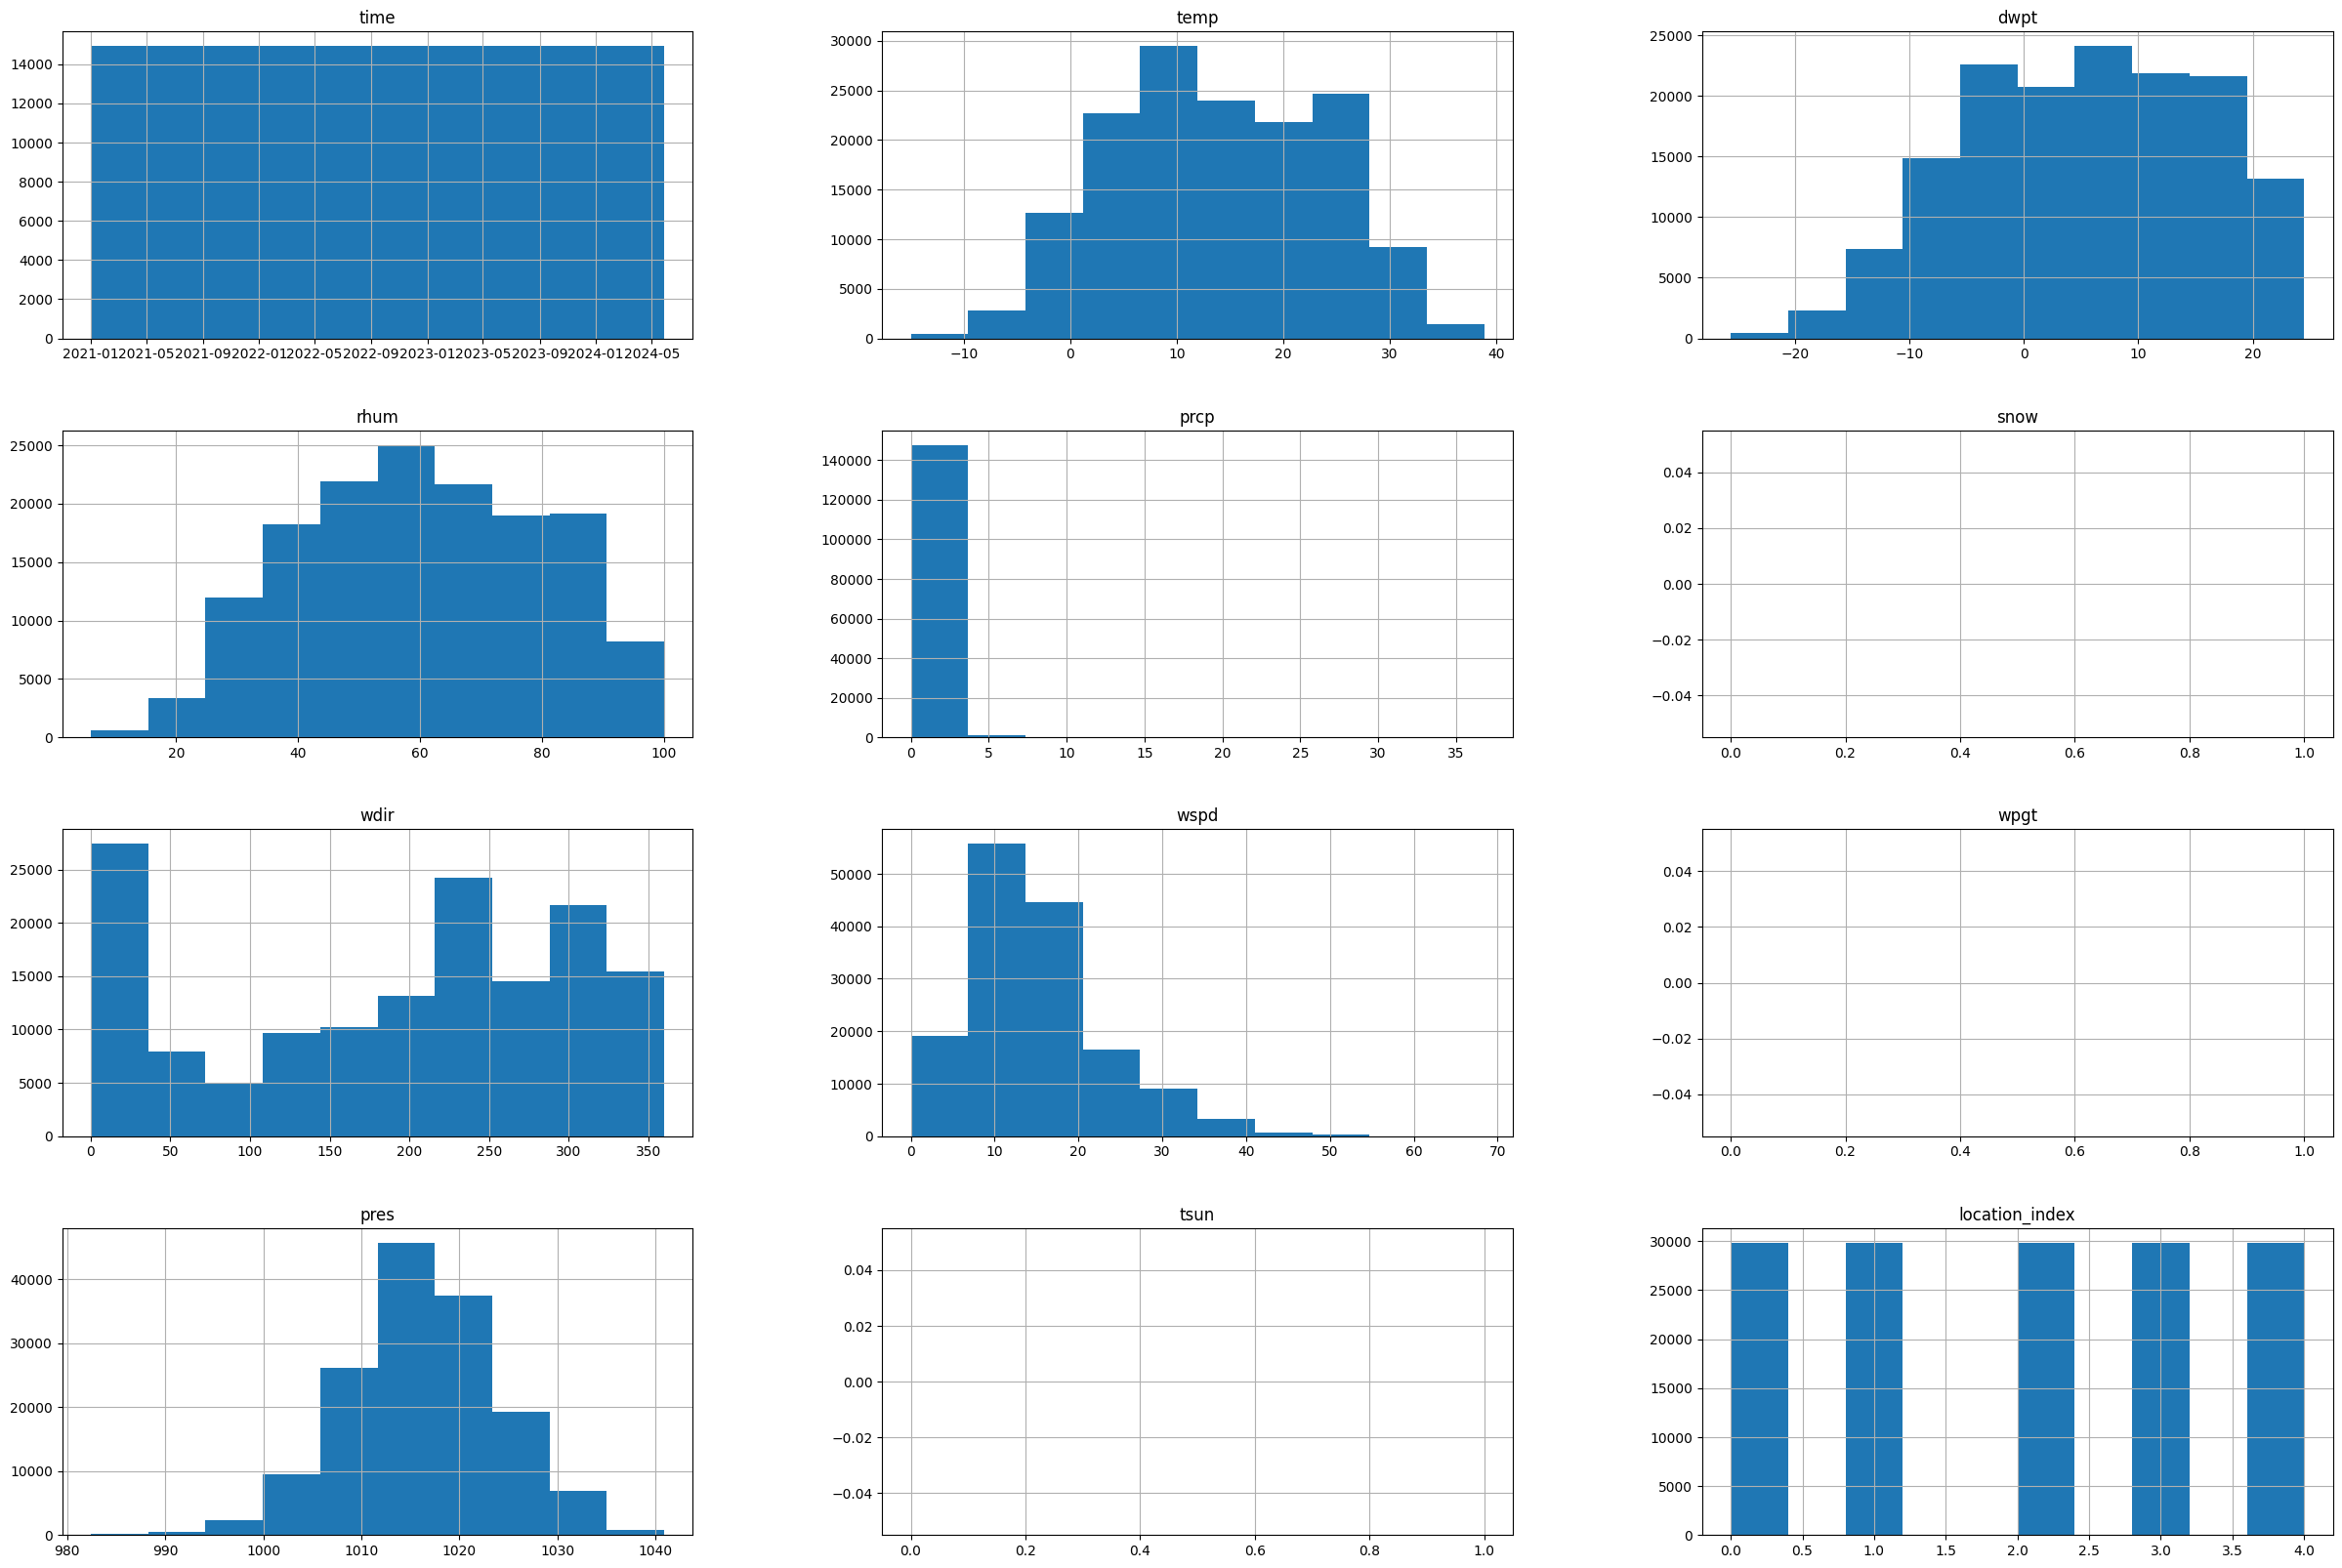

In [36]:
# Plot them all together instead
plt.figure()
df.hist(figsize=(30, 20))

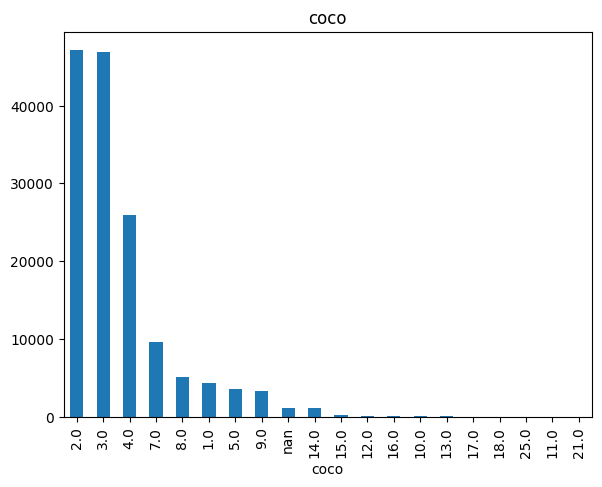

In [37]:
# Plot categoric columns
num_rows = (len(category_columns) + 1) // 2

# Create a single figure with subplots arranged in a 2-column grid
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5*num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over each column
for i, column in enumerate(category_columns):
    # Plot each bar plot on its corresponding subplot
    df[column].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(column)

for j in range(len(category_columns), num_rows * 2):
    fig.delaxes(axes[j])

plt.show()

In [38]:
# Look once again at the summary stats table for categorical features
df_table_categoric = df[category_columns].describe().T
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
# cardinality
category_columns_card = df[category_columns].nunique()
df_category_card = pd.DataFrame(category_columns_card, columns=['card'])

In [39]:
second_val = []
second_freq = []
for category in category_columns:
    # print(df[category].value_counts().index.tolist())
    second_val.append(df[category].value_counts().index.tolist()[1])
    second_freq.append(df[category].value_counts().iloc[1])

In [40]:
# Concatenate numeric, missing and cardinality cols
df_categoric_columns_data_quality_report_table = pd.concat([df_table_categoric, df_category_perc_missing, df_category_card], axis=1)

df_categoric_columns_data_quality_report_table['second'] = second_val
df_categoric_columns_data_quality_report_table['second_freq'] = second_freq

df_categoric_columns_data_quality_report_table = df_categoric_columns_data_quality_report_table[['count', 'unique', 'top', 'freq', 'second', 'second_freq', '%missing', 'card']]
# Print data quality report table for numeric features to a file.
df_categoric_columns_data_quality_report_table.to_csv("Meteostat-DataQualityReport-CategoricFeatures-Table.csv", 
                                         index_label='Feature')
df_categoric_columns_data_quality_report_table

,count,unique,top,freq,second,second_freq,%missing,card
coco,148015.0,19.0,2.0,47135.0,3.0,46935,0.770958,19


In [41]:
# Concatenate numeric, missing and cardinality cols
df_numeric_columns_data_quality_report_table = pd.concat([df_table_numeric, df_numeric_missing, df_numeric_card], axis=1)

# Print data quality report table for numeric features to a file.
df_numeric_columns_data_quality_report_table.to_csv("Meteostat-DataQualityReport-NumericFeatures-Table.csv", 
                                         index_label='Feature')
df_numeric_columns_data_quality_report_table

,count,mean,min,25%,50%,75%,max,std,%missing,card
time,149165,2022-09-14 12:00:00,2021-01-01 00:00:00,2021-11-07 18:00:00,2022-09-14 12:00:00,2023-07-22 06:00:00,2024-05-28 00:00:00,NaN,0.000000,29833
temp,149165.0,13.826273,-15.0,6.1,13.3,22.2,38.9,9.82184,0.000000,116
dwpt,149165.0,5.391405,-25.6,-2.7,6.1,14.0,24.5,10.272043,0.000000,445
rhum,149165.0,60.143365,6.0,45.0,60.0,76.0,100.0,19.786095,0.000000,93
prcp,149155.0,0.155174,0.0,0.0,0.0,0.0,36.8,0.882038,0.006704,101
snow,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0
wdir,149165.0,189.009151,0.0,90.0,220.0,280.0,360.0,113.518617,0.000000,181
wspd,149165.0,14.945433,0.0,9.4,13.0,20.5,68.4,8.496732,0.000000,45
wpgt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0
pres,149165.0,1016.356947,982.4,1011.4,1016.2,1021.6,1040.9,7.797632,0.000000,528


# Logical Integrity Tests

1. Timestamps not before Jan 2021 or after 28th May 2024.
2. 5 timestamps for every hour between 1st Jan 2023 and 28th May 2024 (12313 hours).
3. No temperature in central park in 2023 below NYC Central park min (-16.1) or above NYC central park max (+33.9 C).
4. Wind direction not below 0 or above 360
5. Relative humidity not below 0 or above 100%.
6. Weather condition code not outside of allowed values (1-27).

In [42]:
# Test 1

df[df['time']<start]

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index


In [43]:
df[df['time']> end]

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index


In [44]:
# Test 2
print(df.shape[0] == 29833*5)

True


In [45]:
# Test 3
df[df['temp']< -16.1]

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index


In [46]:
df[(df['time'].dt.year == 2023) & (df['location_index']  == 4) & (df['temp']> 33.9)]

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index
141479,2023-07-12 19:00:00,34.4,15.8,33.0,0.0,NaN,290.0,14.8,NaN,1012.0,NaN,3.0,4
141480,2023-07-12 20:00:00,34.4,15.8,33.0,0.0,NaN,260.0,14.8,NaN,1012.1,NaN,3.0,4
141837,2023-07-27 17:00:00,34.4,22.8,51.0,0.0,NaN,230.0,35.3,NaN,1012.5,NaN,3.0,4
141838,2023-07-27 18:00:00,34.4,22.8,51.0,0.0,NaN,240.0,33.5,NaN,1012.5,NaN,3.0,4
141839,2023-07-27 19:00:00,35.6,23.2,49.0,0.0,NaN,240.0,33.5,NaN,1011.6,NaN,3.0,4
141840,2023-07-27 20:00:00,34.4,21.8,48.0,0.0,NaN,240.0,33.5,NaN,1011.5,NaN,3.0,4
141861,2023-07-28 17:00:00,34.4,20.8,45.0,0.0,NaN,280.0,13.0,NaN,1014.7,NaN,2.0,4
141862,2023-07-28 18:00:00,34.4,20.8,45.0,0.0,NaN,280.0,13.0,NaN,1014.7,NaN,2.0,4
141863,2023-07-28 19:00:00,35.0,20.2,42.0,0.0,NaN,260.0,22.3,NaN,1014.1,NaN,3.0,4
141864,2023-07-28 20:00:00,35.0,19.4,40.0,0.0,NaN,260.0,16.6,NaN,1013.5,NaN,3.0,4


In [47]:
df[ (df['location_index']  == 4) & (df['temp']> 33.9)].shape

(202, 13)

In [48]:
# Test 4
df[df['wdir']<0]

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index


In [49]:
df[df['wdir']>360]

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index


# Comparison with NOAA Central park data

In [68]:
noaa_start = start =  pd.to_datetime('2023-01-01')
noaa_end = pd.to_datetime('2023-06-01')
df_compare = df[(df['location_index'] == 4) & (df['time'] <= noaa_end) & (df['time']>= noaa_start)]

In [69]:
df_compare.shape

(3625, 13)

In [70]:
df_compare.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index
136852,2023-01-01 00:00:00,11.0,10.5,97.0,1.0,NaN,220.0,6.0,NaN,1010.0,NaN,7.0,4
136853,2023-01-01 01:00:00,11.7,10.6,93.0,0.8,NaN,180.0,7.6,NaN,1009.0,NaN,8.0,4
136854,2023-01-01 02:00:00,11.7,11.1,96.0,1.0,NaN,230.0,13.0,NaN,1008.4,NaN,8.0,4
136855,2023-01-01 03:00:00,11.7,11.1,96.0,2.8,NaN,230.0,13.0,NaN,1008.4,NaN,8.0,4
136856,2023-01-01 04:00:00,12.2,11.1,93.0,0.8,NaN,260.0,13.0,NaN,1007.9,NaN,7.0,4


In [71]:
df_noaa = pd.read_csv("./hourly_data_2023/2023/GHCNh_USW00094728_2023.psv", sep='|')
# La Guardia pd.read_csv("./hourly_data_2023/2023/GHCNh_USW00014732_2023.psv", sep='|')
# Central park pd.read_csv("./hourly_data_2023/2023/GHCNh_USW00094728_2023.psv", sep='|')
# The Battery pd.read_csv("./hourly_data_2023/2023/GHCNh_USL000BATN6_2023.psv", sep='|')
# Port Auth pd.read_csv("./hourly_data_2023/2023/GHCNh_USI0000KJRB_2023.psv", sep='|')
# Newark pd.read_csv("./hourly_data_2023/2023/GHCNh_USW00014734_2023.psv", sep='|')

In [72]:
df_noaa['time'] = df_noaa.apply(lambda row: pd.to_datetime(f"{row['Year']}-{row['Month']}-{row['Day']} {row['Hour']}:{row['Minute']}"), axis=1)

In [73]:
df_noaa.head()

,Station_ID,Station_name,Year,Month,Day,Hour,Minute,Latitude,Longitude,Elevation,...,sky_cover_baseht_3_Report_Type,sky_cover_baseht_3_Source_Code,sky_cover_baseht_3_Source_Station_ID,remarks,remarks_Measurement_Code,remarks_Quality_Code,remarks_Report_Type,remarks_Source_Code,remarks_Source_Station_ID,time
0,USW00094728,NY CITY CNTRL PARK,2023,1,1,0,6,40.7789,-73.9692,42.7,...,NaN,NaN,NaN,MET11812/31/22 19:06:03 SPECI KNYC 010006Z 000...,NaN,F,NaN,343,725053-94728,2023-01-01 00:06:00
1,USW00094728,NY CITY CNTRL PARK,2023,1,1,0,18,40.7789,-73.9692,42.7,...,NaN,NaN,NaN,MET10612/31/22 19:18:03 SPECI KNYC 010018Z 030...,NaN,F,NaN,343,725053-94728,2023-01-01 00:18:00
2,USW00094728,NY CITY CNTRL PARK,2023,1,1,0,31,40.7789,-73.9692,42.7,...,NaN,NaN,NaN,MET11112/31/22 19:31:03 SPECI KNYC 010031Z 000...,NaN,F,NaN,343,725053-94728,2023-01-01 00:31:00
3,USW00094728,NY CITY CNTRL PARK,2023,1,1,0,44,40.7789,-73.9692,42.7,...,NaN,NaN,NaN,MET10212/31/22 19:44:03 SPECI KNYC 010044Z 000...,NaN,F,NaN,343,725053-94728,2023-01-01 00:44:00
4,USW00094728,NY CITY CNTRL PARK,2023,1,1,0,49,40.7789,-73.9692,42.7,...,NaN,NaN,NaN,MET09712/31/22 19:49:03 SPECI KNYC 010049Z 000...,NaN,F,NaN,343,725053-94728,2023-01-01 00:49:00


In [74]:
df_noaa.columns.values

array(['Station_ID', 'Station_name', 'Year', 'Month', 'Day', 'Hour',
       'Minute', 'Latitude', 'Longitude', 'Elevation', 'temperature',
       'temperature_Measurement_Code', 'temperature_Quality_Code',
       'temperature_Report_Type', 'temperature_Source_Code',
       'temperature_Source_Station_ID', 'dew_point_temperature',
       'dew_point_temperature_Measurement_Code',
       'dew_point_temperature_Quality_Code',
       'dew_point_temperature_Report_Type',
       'dew_point_temperature_Source_Code',
       'dew_point_temperature_Source_Station_ID',
       'station_level_pressure',
       'station_level_pressure_Measurement_Code',
       'station_level_pressure_Quality_Code',
       'station_level_pressure_Report_Type',
       'station_level_pressure_Source_Code',
       'station_level_pressure_Source_Station_ID', 'sea_level_pressure',
       'sea_level_pressure_Measurement_Code',
       'sea_level_pressure_Quality_Code',
       'sea_level_pressure_Report_Type', 'sea_level_pres

In [75]:
print(df_noaa.dtypes)

Station_ID                           object
Station_name                         object
Year                                  int64
Month                                 int64
Day                                   int64
                                  ...      
remarks_Quality_Code                 object
remarks_Report_Type                 float64
remarks_Source_Code                   int64
remarks_Source_Station_ID            object
time                         datetime64[ns]
Length: 191, dtype: object


In [76]:
df_noaa = df_noaa[['time', 'temperature', 'sea_level_pressure','station_level_pressure', 'wind_direction', 'wind_speed', 'precipitation','relative_humidity' ]]

In [77]:
df_noaa['wind_direction'].replace(999, 0, inplace=True)

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [78]:
df_joined = pd.merge_asof(df_compare, df_noaa, on='time', direction='nearest')

In [79]:
df_joined.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,location_index,temperature,sea_level_pressure,station_level_pressure,wind_direction,wind_speed,precipitation,relative_humidity
0,2023-01-01 00:00:00,11.0,10.5,97.0,1.0,NaN,220.0,6.0,NaN,1010.0,NaN,7.0,4,10.0,NaN,1005.4,0.0,0.0,0.0,93
1,2023-01-01 01:00:00,11.7,10.6,93.0,0.8,NaN,180.0,7.6,NaN,1009.0,NaN,8.0,4,10.0,1009.8,1005.1,0.0,0.0,0.8,96
2,2023-01-01 02:00:00,11.7,11.1,96.0,1.0,NaN,230.0,13.0,NaN,1008.4,NaN,8.0,4,12.8,1008.6,1003.7,250.0,3.1,1.0,93
3,2023-01-01 03:00:00,11.7,11.1,96.0,2.8,NaN,230.0,13.0,NaN,1008.4,NaN,8.0,4,12.2,NaN,1003.4,230.0,2.6,0.5,97
4,2023-01-01 04:00:00,12.2,11.1,93.0,0.8,NaN,260.0,13.0,NaN,1007.9,NaN,7.0,4,12.2,NaN,1003.1,0.0,0.0,0.0,97


In [80]:
df_joined['temp_delta'] = df_joined['temp'] - df_joined['temperature']
df_joined['rhum_delta'] = df_joined['rhum'] - df_joined['relative_humidity']
df_joined['prcp_delta'] = df_joined['prcp'] - df_joined['precipitation']
df_joined['wdir_delta'] = abs(df_joined['wdir'] - df_joined['wind_direction'])
df_joined['wspd_delta'] = df_joined['wspd'] - df_joined['wind_speed']

In [81]:
df_joined.loc[df_joined['wdir_delta']>180, 'wdir_delta'] = 360 - df_joined['wdir_delta']

In [82]:
df_joined[['temp_delta', 'rhum_delta', 'prcp_delta', 'wdir_delta', 'wspd_delta']].describe().T

,count,mean,std,min,25%,50%,75%,max
temp_delta,3625.0,0.506648,1.532693,-7.3,-0.5,0.6,1.2,5.6
rhum_delta,3625.0,0.259862,7.109542,-39.0,-4.0,0.0,4.0,59.0
prcp_delta,3500.0,0.057943,0.536325,-6.4,0.0,0.0,0.0,10.2
wdir_delta,3400.0,56.578235,52.914601,0.0,10.0,40.0,100.0,180.0
wspd_delta,3400.0,12.899441,7.930793,-4.1,7.6,11.7,17.4,47.9


In [83]:
df_table_numeric = df_joined[['temp_delta', 'rhum_delta', 'prcp_delta', 'wdir_delta', 'wspd_delta']].describe().T
df_table_numeric.to_csv("Meteostat-vs-Central-Park-Numeric-Features.csv", 
                                         index_label='Feature')
df_table_numeric

,count,mean,std,min,25%,50%,75%,max
temp_delta,3625.0,0.506648,1.532693,-7.3,-0.5,0.6,1.2,5.6
rhum_delta,3625.0,0.259862,7.109542,-39.0,-4.0,0.0,4.0,59.0
prcp_delta,3500.0,0.057943,0.536325,-6.4,0.0,0.0,0.0,10.2
wdir_delta,3400.0,56.578235,52.914601,0.0,10.0,40.0,100.0,180.0
wspd_delta,3400.0,12.899441,7.930793,-4.1,7.6,11.7,17.4,47.9


array([[<Axes: title={'center': 'temp_delta'}>,
        <Axes: title={'center': 'rhum_delta'}>],
       [<Axes: title={'center': 'prcp_delta'}>,
        <Axes: title={'center': 'wdir_delta'}>],
       [<Axes: title={'center': 'wspd_delta'}>, <Axes: >]], dtype=object)

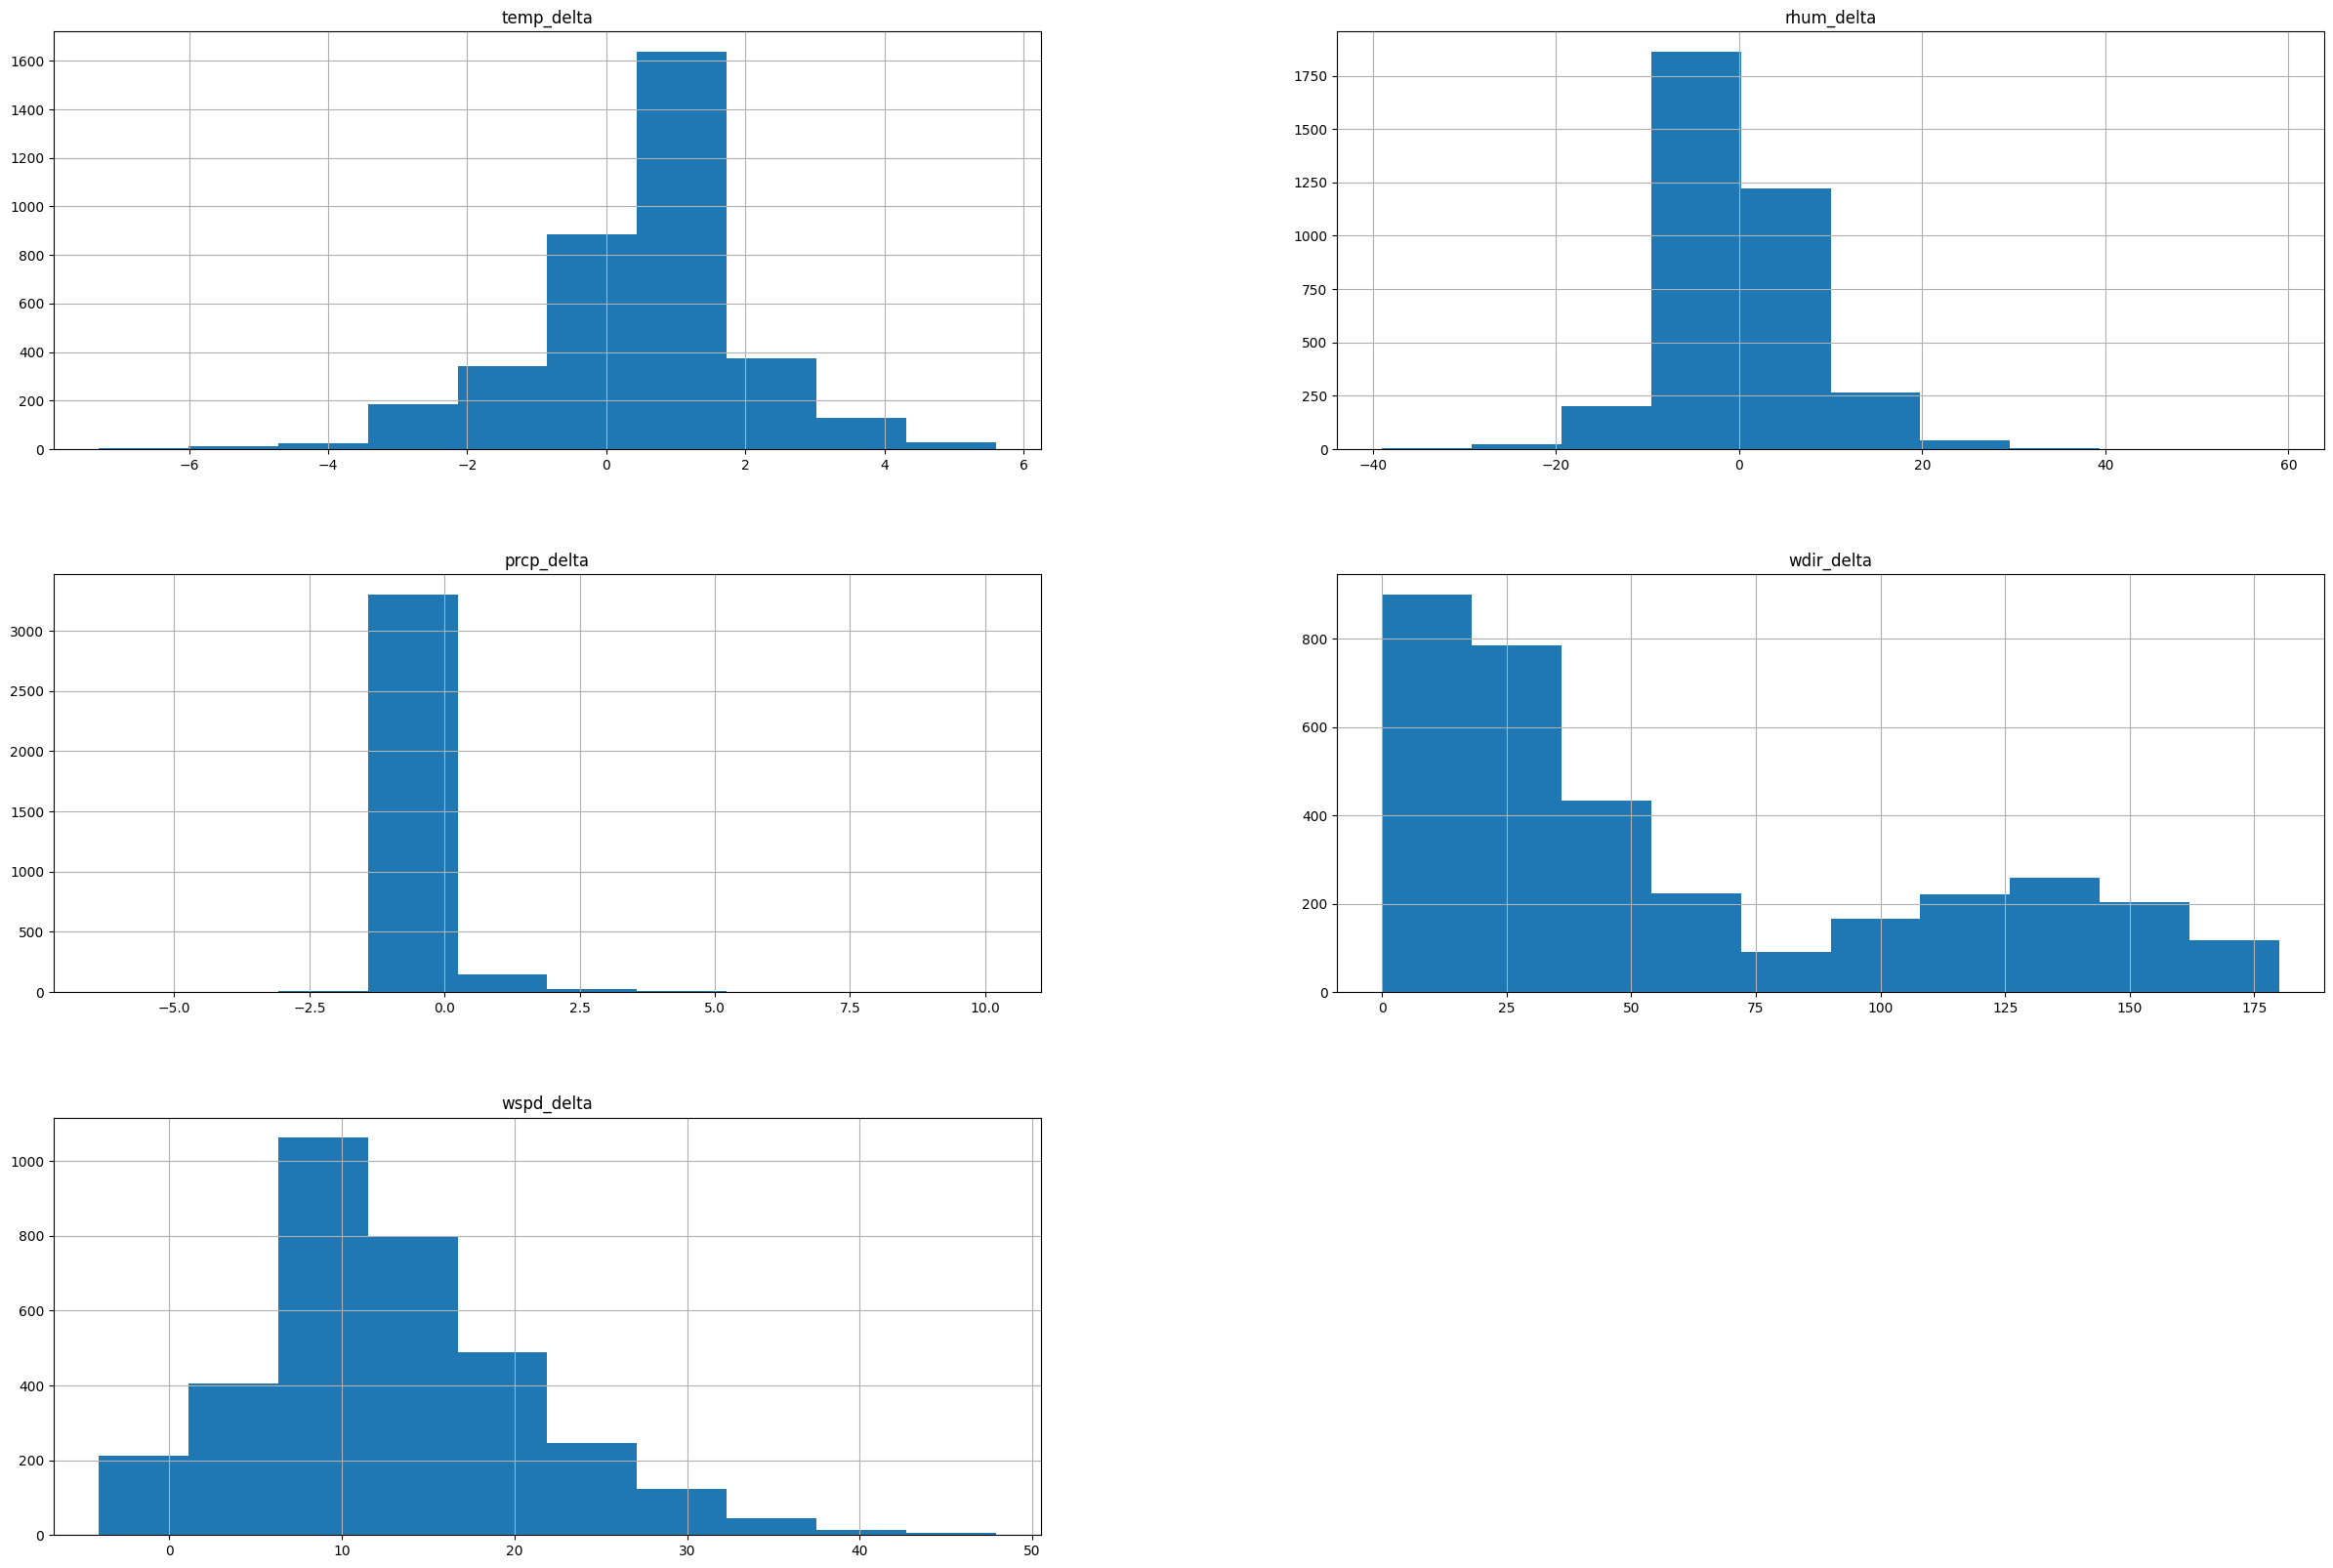

In [84]:
df_joined[['temp_delta', 'rhum_delta', 'prcp_delta', 'wdir_delta', 'wspd_delta']].hist(figsize=(30, 20))